In what situations might you choose to use ANOVA over linear regression or vice versa? Provide a real-life example dataset and explain how you would approach the data analysis using either ANOVA or linear regression. Justify your choice of one of the two approaches. How can Python be used to develop a useful tool in this context?

Both linear regression and ANOVA models allow for the statistical assessment of one features affect on another. Both can be used to produce a model that helps predict one continous feature based on other features. We would use linear regression in the case where we are comparing features that are continous only. If the predictor variable is categorical, ANOVA would be the preferred measure of analysis. 

Situations where ANOVA is preferred
- Comparing the effectiveness of different drugs or products
- Comparing which products customers are more likely to buy
- Identifying if different plant species have significant differences in average length

Situations where Linear Regression is preffered
- Comparing product prices to product volume
- Investigating how years of experience affects average pay
- Investigating how doage of a drug affects INR levels

In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [14]:
df = pd.read_csv('CoffeeSales.csv')
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

We can use anova to compare categorical features with total bill - we can pick store location

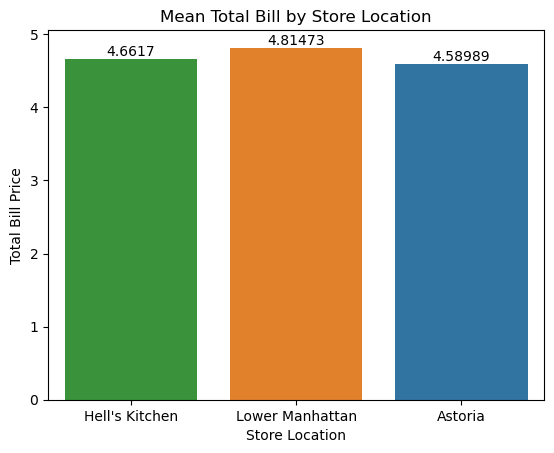

In [6]:
#plot means of groups
ax = sns.barplot(data=df, x='store_location', y='Total_Bill', hue='store_location',
                 estimator = 'mean', errorbar=None, order = df.sort_values('Total_Bill').store_location)
ax.set_xlabel('Store Location')
ax.set_ylabel('Total Bill Price')
ax.set_title('Mean Total Bill by Store Location')
for i in ax.containers:
    ax.bar_label(i,)

In [27]:
hells_kitchen = df['Total_Bill'].loc[df['store_location']=="Hell's Kitchen"]
lower_manhattan = df['Total_Bill'].loc[df['store_location']=='Lower Manhattan']
astoria = df['Total_Bill'].loc[df['store_location']=='Astoria']

In [28]:
# Investigate equal variance assumption
#use levene method to investigate
stats.levene(hells_kitchen,lower_manhattan,astoria)

LeveneResult(statistic=64.8706567804023, pvalue=6.906866911467077e-29)

Our data does not meet the assumption of unequal variance 

In [29]:
#test for normalcy in the model with anderson darling
stats.anderson(df['Total_Bill'])

AndersonResult(statistic=14036.974604885996, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

At all critical values of the anderson darling test, the p-values do not fall below 0.05, so we can maintain the null hypothesis that our data follows a normal distribution

In [30]:
# perform Welch's ANOVA which does not assume equal variance
pg.welch_anova(dv='Total_Bill', between='store_location', data=df) 

,Source,ddof1,ddof2,F,p-unc,np2
0,store_location,2,94330.270549,65.331376,4.431762e-29,0.000484


The ANOVA test results above tell us that the variance between groups is 65 times larger than the variance within groups. So although the differences of means between groups is small, ANOVA testing tells us it is significant. 

References

Frost, J. (2023, October 26). How F-tests work in analysis of variance (ANOVA). Statistics By Jim. https://statisticsbyjim.com/anova/f-tests-anova/ 

GfG. (2022, February 21). How to perform Welch’s Anova in python. GeeksforGeeks. https://www.geeksforgeeks.org/how-to-perform-welchs-anova-in-python/ 

Light_Shot. (2024, March 30). Coffee Shop Sales Analysis. Kaggle. https://www.kaggle.com/datasets/divu2001/coffee-shop-sales-analysis 

Tim. (2022, February 23). Anderson-Darling Test & Statistic: Definition, examples. Statistics How To. https://www.statisticshowto.com/anderson-darling-test/ 

Zach. (2021, May 7). Anova vs. regression: What’s the difference? Statology. https://www.statology.org/anova-vs-regression/ 
